In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
!pip install torch torchvision transformers timm

In [7]:
## Implement BLIP model

from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image
import requests

# Load the model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load and preprocess an image
img_url = "/kaggle/input/test-img/How-to-Develop-a-Deep-Learning-Caption-Generation-Model-in-Python-from-Scratch.jpg"
image = Image.open(img_url)

# Generate captions
inputs = processor(images=image, return_tensors="pt")
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)
print()
print("################   GENERATED CAPTION   ##################")
print()
print(caption)

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(



################   GENERATED CAPTION   ##################

a dog sitting on the beach with a person walking by


In [9]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

# Define a custom dataset class
class Flickr8kDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith('.jpg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        
        if self.transform:
            image = self.transform(image)
        
        return image


In [10]:
# Transformation for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Directory containing images
image_dir = '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset'

# Create the dataset and dataloader
flickr_dataset = Flickr8kDataset(image_dir=image_dir, transform=transform)
train_loader = DataLoader(flickr_dataset, batch_size=8, shuffle=True, num_workers=0)

# Check one batch of images
for images in train_loader:
    print(images.size())  # Output: [32, 3, 224, 224] (batch size, channels, height, width)
    break


torch.Size([8, 3, 224, 224])


In [11]:
import os

# Specify the path to the directory and the image file to be deleted
dataset_path = "/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset"
image_to_remove = "/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/2258277193_586949ec62.jpg"

# Combine directory and filename to get the full path of the image
image_path = os.path.join(dataset_path, image_to_remove)

# Check if the image exists and delete it
if os.path.exists(image_path):
    os.remove(image_path)
    print(f"Image '{image_to_remove}' has been successfully removed.")
else:
    print(f"Image '{image_to_remove}' not found in the specified directory.")

Image '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/2258277193_586949ec62.jpg' not found in the specified directory.


In [12]:
# Set the model to training mode
model.train()


BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [17]:
## Preparing the dataset for finetuning...we need both captions and images for fine tuning

import json

# Load the captions file
caption_file = r'/kaggle/input/flicker8k-dataset/Flickr8k_text/Flickr8k.token.txt'  

# Parse the captions into a dictionary: {image_filename: caption}
captions_dict = {}
with open(caption_file, 'r') as f:
    for line in f:
        img_caption_pair = line.split("\t")
        img_name = img_caption_pair[0].split("#")[0]  # Extract image name
        caption = img_caption_pair[1].strip()  # Extract caption
        captions_dict[img_name] = caption

# Verify an example caption
print(captions_dict['1000268201_693b08cb0e.jpg'])  # Check a sample image caption pair



A little girl in a pink dress going into a wooden cabin .


In [16]:
from PIL import Image
import os
import logging
from torch.utils.data import Dataset

class Flickr8kCaptionDataset(Dataset):
    def __init__(self, data, transform=None, processor=None):
        self.data = data
        self.transform = transform
        self.processor = processor
        
        # Set up logging to track missing images
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)

        # Filter out invalid image paths
        self.valid_data = self._filter_valid_images()

    def _filter_valid_images(self):
        valid_data = []
        for image_path, caption in self.data:
            # Check if the image exists
            if os.path.exists(image_path):
                valid_data.append((image_path, caption))
            else:
                # Attempt to fix incorrect file extension
                corrected_image_path = image_path.replace(".jpg.1", ".jpg")
                if os.path.exists(corrected_image_path):
                    valid_data.append((corrected_image_path, caption))
                else:
                    self.logger.warning(f"Image not found: {image_path} and corrected path {corrected_image_path}")
        
        return valid_data

    def __getitem__(self, idx):
        image_path, caption = self.valid_data[idx]
        
        # Open image and convert to RGB
        try:
            image = Image.open(image_path).convert('RGB')
        except Exception as e:
            self.logger.warning(f"Error opening image {image_path}: {e}")
            return None  # This should not happen as we've filtered valid images

        # Apply any image transforms
        if self.transform:
            image = self.transform(image)

        # Process the caption
        inputs = self.processor(text=caption, padding="max_length", truncation=True, return_tensors="pt")
        return image, inputs.input_ids.squeeze(), inputs.attention_mask.squeeze()

    def __len__(self):
        return len(self.valid_data)



In [18]:
# Create a list of (image_path, caption) tuples
data = [(os.path.join(image_dir, img_filename), caption) for img_filename, caption in captions_dict.items()]
#print(data[5])

# Create the dataset and dataloader
train_dataset = Flickr8kCaptionDataset(data=data, processor=processor, transform=transform)
#print(train_dataset[0])
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Check one batch
for pixel_values, input_ids, attention_mask in train_loader:
    print("Pixel values shape:", pixel_values.shape)
    print("Input IDs shape:", input_ids.shape)
    print("Attention mask shape:", attention_mask.shape)
    break

Pixel values shape: torch.Size([8, 3, 224, 224])
Input IDs shape: torch.Size([8, 512])
Attention mask shape: torch.Size([8, 512])


In [19]:
# setting up the optimizer and loss function for fine tuning

from torch.optim import AdamW
from transformers import get_scheduler

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Scheduler and number of epochs
num_epochs = 3
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * num_epochs
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [20]:
image_path = '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/1042020065_fb3d3ba5ba.jpg'
image = Image.open(image_path).convert('RGB')
print(image)


<PIL.Image.Image image mode=RGB size=500x334 at 0x7CE8FEE2B610>


In [52]:
from tqdm import tqdm

# Training loop with tqdm
for epoch in range(num_epochs):
    epoch_loss = 0.0
    num_batches = 0
    
    # Use tqdm to create a progress bar for the batches
    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch") as tepoch:
        for batch in tepoch:
            # Unpack the batch
            pixel_values, input_ids, attention_mask = batch
            
            # Forward pass
            outputs = model(
                pixel_values=pixel_values.to(device),
                input_ids=input_ids.to(device),
                attention_mask=attention_mask.to(device),
                labels=input_ids.to(device)  # Setting labels as input_ids for loss calculation
            )

            # Compute loss and backpropagate
            loss = outputs.loss
            loss.backward()

            # Optimization step
            optimizer.step()
            optimizer.zero_grad()

            # Update the progress bar with the current loss
            tepoch.set_postfix(loss=loss.item())

            # Accumulate epoch loss and count batches
            epoch_loss += loss.item()
            num_batches += 1

    # Compute the average loss for the epoch
    avg_epoch_loss = epoch_loss / num_batches if num_batches > 0 else float('inf')
    print(f"Epoch {epoch+1}/{num_epochs} completed with Average Loss: {avg_epoch_loss:.4f}.")


Epoch 1/3: 100%|██████████| 1012/1012 [26:18<00:00,  1.56s/batch, loss=0.0657]


Epoch 1/3 completed with Average Loss: 0.0588.


Epoch 2/3: 100%|██████████| 1012/1012 [26:17<00:00,  1.56s/batch, loss=0.0598]


Epoch 2/3 completed with Average Loss: 0.0441.


Epoch 3/3: 100%|██████████| 1012/1012 [26:10<00:00,  1.55s/batch, loss=0.0358]

Epoch 3/3 completed with Average Loss: 0.0332.


In [53]:
# Save the model weights after all epochs are completed
final_model_save_path = "model_weights_final.pt"
torch.save(model.state_dict(), final_model_save_path)
print(f"Final model weights saved to {final_model_save_path}.")

Final model weights saved to model_weights_final.pt.


In [2]:
!pip install nltk rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=0a30ef3f1bf1154641cc81d49dce2fccb8065dd93e684a28511ab7e9059966ce
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [2]:
############## AM GOING TO USE AND MODIFY THIS CODE SNIPPET ONLY ########################################################

import torch

# Load the model weights
model.load_state_dict(torch.load("/kaggle/input/caption_generation_model/tensorflow1/default/1/model_weights_final.pt"))
model.eval()  # Set the model to evaluation mode for inference

def evaluation(image_path):
    model.eval()  # Set model to evaluation mode
    
    # Open the image and process it for the model
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)
    
    # Generate caption
    generated_ids = model.generate(**inputs)
    generated_caption = processor.decode(generated_ids[0], skip_special_tokens=True)

    # Print the generated caption
    print("Generated caption")
    print(generated_caption)

# Test images
test_image = '/kaggle/input/test-img/How-to-Develop-a-Deep-Learning-Caption-Generation-Model-in-Python-from-Scratch.jpg'
test_image_1 = '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/1002674143_1b742ab4b8.jpg'
test_image_2 = '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/1026685415_0431cbf574.jpg'

# Run evaluation on different test images
print('\nOutput for test_image')
evaluation(test_image)
print()

print('\nOutput for test_image_1')
evaluation(test_image_1)
print()

print('\nOutput for test_image_2')
evaluation(test_image_2)
print()


################################### ###################################### LESS GO #####################################################

NameError: name 'model' is not defined

In [9]:
#######################################################################################################################


import os
import numpy as np
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from tqdm import tqdm  # Import tqdm for progress bar

# Load the image captioning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to generate caption for an image
def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)
    
    # Generate caption using the model
    generated_ids = model.generate(**inputs)
    generated_caption = processor.decode(generated_ids[0], skip_special_tokens=True)
    
    return generated_caption

# Image directory and metadata
img_parent_dir = '/kaggle/input/images-for-eeg/training_images'
img_metadata = np.load('/kaggle/input/images-for-eeg/image_metadata.npy', allow_pickle=True).item()

# Generate captions for training images
captions = []

# Use tqdm for progress bar visualization
for idx in tqdm(range(len(img_metadata['train_img_files'])), desc="Generating captions", unit="image"):
    img_dir = os.path.join(img_parent_dir, 'training_images', img_metadata['train_img_concepts'][idx], img_metadata['train_img_files'][idx])
    
    # Generate caption for the current image
    caption = generate_caption(img_dir)
    captions.append(caption)

# Save the captions as a numpy array
np.save('generated_captions.npy', np.array(captions))

# Print some of the generated captions to check
for i in range(5):
    print(f"Image {i+1}: {captions[i]}")

######################################################################################

Generating captions: 100%|██████████| 16540/16540 [58:32<00:00,  4.71image/s] 


Image 1: a small pig walking across a dirt covered ground
Image 2: a small pig walking across a dirt covered ground
Image 3: a small deer is sitting in a pile of hay
Image 4: a small animal walking across a lush green field
Image 5: a small animal laying on the ground


In [31]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BlipForConditionalGeneration, BlipProcessor
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer
from tqdm import tqdm
from torchvision import transforms
from PIL import Image
import os

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path to the fine-tuned BLIP model weights
model_weights_path = '/kaggle/input/caption_generation_model/tensorflow1/default/1/model_weights_final.pt'  # Update this path

# Load the BLIP model and processor
model_name = "Salesforce/blip-image-captioning-base"
model = BlipForConditionalGeneration.from_pretrained(model_name).to(device)
processor = BlipProcessor.from_pretrained(model_name)

# Load the fine-tuned weights into the model
model.load_state_dict(torch.load(model_weights_path, map_location=device), strict=False)

# Modified Flickr8kCaptionDataset class with debug prints
class Flickr8kCaptionDataset(Dataset):
    def __init__(self, data, transform=None, processor=None):
        self.data = data
        self.transform = transform
        self.processor = processor
        
        # Set up logging to track missing images
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)

        # Filter out invalid image paths
        self.valid_data = self._filter_valid_images()

    def _filter_valid_images(self):
        valid_data = []
        for image_path, caption in self.data:
            # Check if the image exists
            if os.path.exists(image_path):
                valid_data.append((image_path, caption))
            else:
                # Attempt to fix incorrect file extension
                corrected_image_path = image_path.replace(".jpg.1", ".jpg")
                if os.path.exists(corrected_image_path):
                    valid_data.append((corrected_image_path, caption))
                else:
                    self.logger.warning(f"Image not found: {image_path} and corrected path {corrected_image_path}")
        
        return valid_data

    def __getitem__(self, idx):
        image_path, caption = self.valid_data[idx]
        
        # Open image and convert to RGB
        try:
            image = Image.open(image_path).convert('RGB')
        except Exception as e:
            self.logger.warning(f"Error opening image {image_path}: {e}")
            return None  # This should not happen as we've filtered valid images

        # Apply any image transforms
        if self.transform:
            image = self.transform(image)

# Check dataset loading
caption_file = '/kaggle/input/flicker8k-dataset/Flickr8k_text/Flickr8k.token.txt'  # Update this path if needed
val_dataset = Flickr8kCaptionDataset(caption_file, transform=transform)
print(f"Dataset length: {len(val_dataset)}")

# Visualize a few samples
visualize_sample(val_dataset, num_samples=3)



# Define any image transformations (must match model's expected input size)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Change this size if your model expects different dimensions
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Use ImageNet normalization values
])

# Initialize the dataset with your caption file
caption_file = '/kaggle/input/flicker8k-dataset/Flickr8k_text/Flickr8k.token.txt'  # Update this path
val_dataset = Flickr8kCaptionDataset(caption_file, transform=transform)

# Create the DataLoader for validation
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)


/tmp/ipykernel_30/1397199575.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_weights_path, map_location=device), strict=False)


ValueError: not enough values to unpack (expected 2, got 1)

Dataset length: 40455


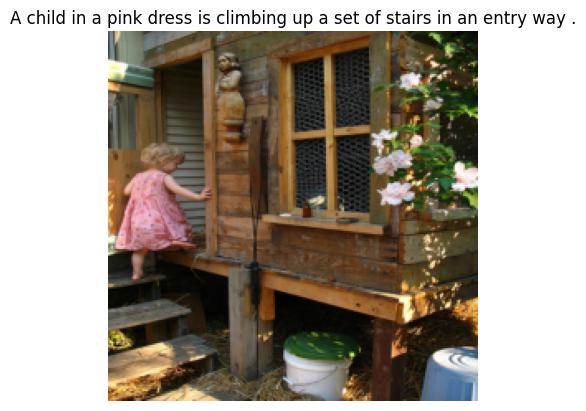

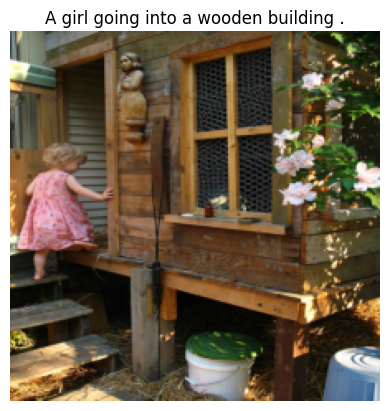

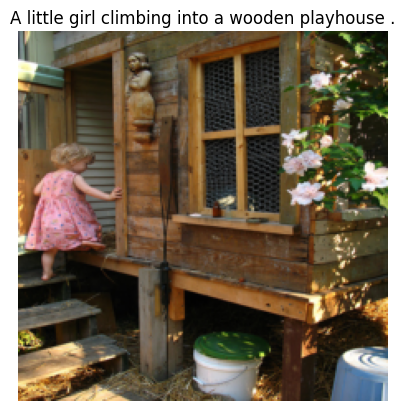

In [32]:
import os
import logging
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class Flickr8kCaptionDataset(Dataset):
    def __init__(self, data, transform=None):
        """
        Initialize the Flickr8k Caption Dataset.
        
        Args:
        - data: List of tuples containing (image_path, caption).
        - transform: Optional transform to be applied on an image.
        """
        self.data = data
        self.transform = transform

        # Set up logging to track missing images
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)

        # Filter out invalid image paths
        self.valid_data = self._filter_valid_images()

    def _filter_valid_images(self):
        """Filter out any entries with invalid image paths."""
        valid_data = []
        for image_path, caption in self.data:
            # Check if the image exists
            if os.path.exists(image_path):
                valid_data.append((image_path, caption))
            else:
                # Attempt to fix incorrect file extension
                corrected_image_path = image_path.replace(".jpg.1", ".jpg")
                if os.path.exists(corrected_image_path):
                    valid_data.append((corrected_image_path, caption))
                else:
                    self.logger.warning(f"Image not found: {image_path} and corrected path {corrected_image_path}")
        
        return valid_data

    def __len__(self):
        """Return the total number of valid samples."""
        return len(self.valid_data)

    def __getitem__(self, idx):
        """Get a single sample by index."""
        if idx >= len(self.valid_data):
            raise IndexError("Index out of range.")
            
        image_path, caption = self.valid_data[idx]
        
        # Open image and convert to RGB
        try:
            image = Image.open(image_path).convert('RGB')
        except Exception as e:
            self.logger.warning(f"Error opening image {image_path}: {e}")
            return None  # This should not happen as we've filtered valid images

        # Apply any image transforms
        if self.transform:
            image = self.transform(image)
        
        return image, caption

def load_flickr8k_data(caption_file, image_dir):
    """
    Load the Flickr8k data from a caption file and image directory.
    
    Args:
    - caption_file: Path to the caption file.
    - image_dir: Directory where images are stored.
    
    Returns:
    - data: List of tuples containing (image_path, caption).
    """
    data = []
    with open(caption_file, 'r') as f:
        for line in f:
            # Remove the "#number" suffix after the image filename
            image_info, caption = line.strip().split('\t')
            image_filename = image_info.split('#')[0]  # Retain only the base filename
            
            # Construct the full image path
            image_full_path = os.path.join(image_dir, image_filename)
            data.append((image_full_path, caption))
    
    return data

# Define any image transformations (must match model's expected input size)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Use ImageNet normalization values
])

# Load caption file and image directory paths
caption_file = '/kaggle/input/flicker8k-dataset/Flickr8k_text/Flickr8k.token.txt'  # Update this path if needed
image_dir = '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset'  # Update this path if needed

# Load data from caption file and image directory
data = load_flickr8k_data(caption_file, image_dir)

# Initialize the dataset with parsed data and defined transform
val_dataset = Flickr8kCaptionDataset(data, transform=transform)

# Create the DataLoader for validation
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Print dataset information and visualize a few samples
print(f"Dataset length: {len(val_dataset)}")

# Function to visualize some sample images and captions
def visualize_sample(dataset, num_samples=3):
    import matplotlib.pyplot as plt

    for i in range(num_samples):
        image, caption = dataset[i]
        image = image.permute(1, 2, 0)  # Change the order to (H, W, C) for visualization
        image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Re-normalize
        image = image.numpy()

        plt.imshow(image)
        plt.title(caption)
        plt.axis('off')
        plt.show()

# Visualize a few samples
visualize_sample(val_dataset, num_samples=3)


In [36]:
import torch
from transformers import BlipProcessor
from tqdm import tqdm

def evaluate_model_debug(model, dataloader, processor, device):
    model.eval()
    predictions = []
    
    # Disable gradient calculation for evaluation
    with torch.no_grad():
        for batch in tqdm(dataloader):
            pixel_values, captions = batch
            #print(f"Batch pixel values shape: {pixel_values.shape}")
            #print(f"Captions: {captions}")

            # Convert pixel values to the correct format for the BLIP processor
            pixel_values = pixel_values.to(device)

            # Prepare the inputs for the BLIP model
            inputs = processor(images=pixel_values, return_tensors="pt").to(device)
            #print(f"Inputs prepared for model: {inputs}")

            # Generate captions for all images in the batch
            outputs = model.generate(**inputs)
            decoded_predictions = processor.batch_decode(outputs, skip_special_tokens=True)
            predictions.extend(decoded_predictions)
            #print(f"Generated captions: {decoded_predictions}")

    return predictions

# Assuming you have already defined the transform without normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to model input size
    transforms.ToTensor()  # Remove normalization
])

# Load the dataset
caption_file = '/kaggle/input/flicker8k-dataset/Flickr8k_text/Flickr8k.token.txt'  # Update this path
val_dataset = Flickr8kCaptionDataset(data, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)



# Now, initialize your processor and call the evaluation function
processor = BlipProcessor.from_pretrained('Salesforce/blip-image-captioning-base')  # Replace with your model's processor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Call the evaluation function
predictions = evaluate_model_debug(model, val_loader, processor, device)


100%|██████████| 5057/5057 [1:57:19<00:00,  1.39s/it]  


In [38]:
!pip install rouge

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [41]:
!git clone https://github.com/salaniz/pycocoevalcap.git

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Cloning into 'pycocoevalcap'...
remote: Enumerating objects: 821, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 821 (delta 5), reused 15 (delta 4), pack-reused 797 (from 1)
Receiving objects: 100% (821/821), 130.06 MiB | 43.82 MiB/s, done.
Resolving deltas: 100% (424/424), done.


In [ ]:
import nltk
from nltk.translate.bleu_score import corpus_bleu
#from rouge import Rouge
#from pycocoevalcap.meteor import Meteor

# Ensure NLTK data is downloaded (for BLEU)
nltk.download('punkt')

def calculate_metrics(predictions, references):
    # Convert references to the required format for BLEU
    references_for_bleu = [[ref.split() for ref in refs] for refs in references]
    
    # Calculate BLEU score
    bleu_score = corpus_bleu(references_for_bleu, [pred.split() for pred in predictions])
    
    # Calculate ROUGE score
    #rouge = Rouge()
    #rouge_score = rouge.get_scores(predictions, references, avg=True)

    # Calculate METEOR score
    #meteor = Meteor()
    #meteor_score = meteor.compute_score(references, predictions)

    return {
        "BLEU": bleu_score,
    }

# After running your evaluation
predictions, references = evaluate_model_debug(model, val_loader, processor, device)

# Calculate metrics
metrics = calculate_metrics(predictions, references)

# Print metrics
print("Evaluation Metrics:")
print(f"BLEU Score: {metrics['BLEU']}")
#print(f"ROUGE Score: {metrics['ROUGE']}")
#print(f"METEOR Score: {metrics['METEOR']}")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  6%|▌         | 290/5057 [06:38<1:37:27,  1.23s/it]